In [151]:
# 导入库
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set(style="white")
pd.set_option("display.max_rows", 1000)


In [152]:
#X = iris.data[0:2]
#Y = iris.data['target']
iris = load_iris()
X = iris.data
Y = iris.target
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [153]:
Y = Y.reshape(-1,1)
print(Y.shape)

(150, 1)


In [154]:
# iris数据集信息可视化
data = pd.DataFrame(np.concatenate((X, Y), axis=1),
                    columns=["x1", "x2", "x3", "x4", "y"])
data["y"] = data["y"].astype("int64")
data.head() 


,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


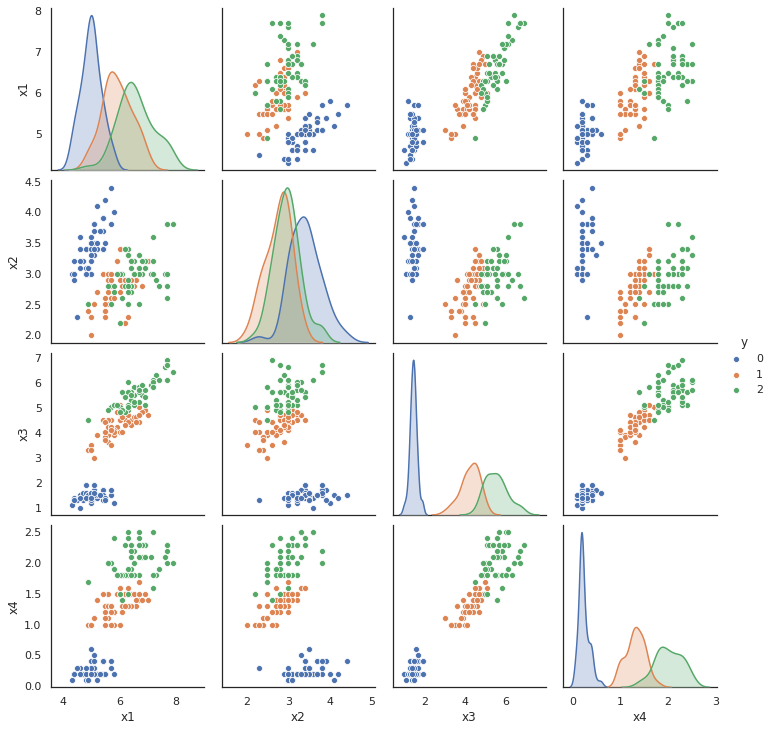

In [155]:
# 四个变量两两散点图
sns.pairplot(data, hue="y")

In [ ]:
# 数据标准化
scaler = MinMaxScaler()
data.iloc[:, :4] = scaler.fit_transform(data.iloc[:, :4])
data.head()

,x1,x2,x3,x4,y
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [ ]:
num = X.shape[0] # 样本总数
ratio = 7/3 # 划分比例，训练集数目:测试集数目
num_test = int(num/(1+ratio)) # 测试集样本数目
num_train = num -  num_test # 训练集样本数目
index = np.arange(num) # 产生样本标号
np.random.shuffle(index) # 洗牌
x_test = X[index[:num_test],:] # 取出洗牌后前 num_test 作为测试集
y_test = Y[index[:num_test]]
x_train = X[index[num_test:],:] # 剩余作为训练集
y_train = Y[index[num_test:]]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
# print(x_train.shape)
print(x_train.shape)
x_train = x_train.reshape(-1,4)

(105, 4)


In [160]:
# 求众数
def mode(a):
    counts = np.bincount(a)  
    return np.argmax(counts)

In [161]:
x = iris.get('data')
y = iris.get('target')

# 随机划分训练集和测试集
num = x.shape[0] # 样本总数
ratio = 7/3 # 划分比例，训练集数目:测试集数目
num_test = int(num/(1+ratio)) # 测试集样本数目
num_train = num -  num_test # 训练集样本数目
index = np.arange(num) # 产生样本标号
np.random.shuffle(index) # 洗牌
x_test = x[index[:num_test],:] # 取出洗牌后前 num_test 作为测试集
y_test = y[index[:num_test]]
x_train = x[index[num_test:],:] # 剩余作为训练集
y_train = y[index[num_test:]]

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
print(x.shape)

(150, 4)


In [162]:
centers = kmeans.cluster_centers_
for i in range(3):
    index = y_train == i
    p = kmeans.predict(x_train[index,:])
    pp = mode(p) # 求实际类别为 i 所对应的类别标号 pp
    kmeans.cluster_centers_[i] = centers[pp] # 相应的调整类别标号，以正确预测

In [163]:
y_test_pre_kmeans = kmeans.predict(x_test)
print("y_test_pre:")
print(y_test_pre_kmeans)
print("y_test:")
print(y_test)

y_test_pre:
[1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0]
y_test:
[1 0 1 0 0 0 0 1 1 1 0 2 1 1 0 2 0 0 1 2 0 2 2 0 1 0 2 1 2 2 0 1 1 2 0 2 0
 0 2 2 1 2 2 2 0]


In [164]:
# 计算分类准确率
acc = calc_acc(y_test_pre_kmeans, y_test)
acc = sum(y_test_pre_kmeans==y_test)/y_test.shape[0]
print('the accuracy is', acc) # 显示预测准确率

the accuracy is 0.6666666666666666


In [165]:
# 采用EM聚类
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(x_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [171]:
y_test_pre_EM = clf.predict(x_test)
print("y_test_pre:")
print(y_test_pre_EM)
print("y_test:")
print(y_test)

y_test_pre:
[0 1 0 1 1 1 1 2 0 0 1 2 0 0 1 2 1 1 0 2 1 2 2 1 0 1 2 2 2 2 1 0 2 2 1 2 1
 1 2 2 0 2 2 2 1]
y_test:
[1 0 1 0 0 0 0 1 1 1 0 2 1 1 0 2 0 0 1 2 0 2 2 0 1 0 2 1 2 2 0 1 1 2 0 2 0
 0 2 2 1 2 2 2 0]


In [172]:
# 计算分类准确率
acc = calc_acc(y_test_pre_EM, y_test)
acc = sum(y_test_pre_EM==y_test)/y_test.shape[0]
print('the accuracy is', acc) # 显示预测准确率

the accuracy is 0.3333333333333333


In [173]:
# 谱聚类
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3,assign_labels="discretize",random_state=0).fit(x_train)
clustering.labels_

array([1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1])

In [174]:
y_test_pre_sp = clustering.fit_predict(x_test)
print("y_test_pre:")
print(y_test_pre_sp)
print("y_test:")
print(y_test)

y_test_pre:
[1 2 1 2 2 2 2 1 1 1 2 0 1 1 2 0 2 2 1 0 2 0 1 2 1 2 1 1 0 0 2 1 1 0 2 0 2
 2 1 0 1 0 0 0 2]
y_test:
[1 0 1 0 0 0 0 1 1 1 0 2 1 1 0 2 0 0 1 2 0 2 2 0 1 0 2 1 2 2 0 1 1 2 0 2 0
 0 2 2 1 2 2 2 0]


In [175]:
# 计算分类准确率
acc = calc_acc(y_test_pre_sp, y_test)
acc = sum(y_test_pre_sp==y_test)/y_test.shape[0]
print('the accuracy is', acc) # 显示预测准确率

the accuracy is 0.28888888888888886
